# 1
## Exploring the significance of the length of a movie

### Importing Necessary Libraries

In [58]:
from importlib import reload

import sqlite3
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

import seaborn as sns

In [59]:
conn = sqlite3.connect("movies_db.sqlite")
cur = conn.cursor()

In [4]:
for row in cur.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('imdb_title_crew',)
('imdb_title_ratings',)
('imdb_title_principals',)
('rt_movie_info',)
('rt_reviews',)
('tmdb_movies',)
('tn_movie_budgets',)
('imdb_name_basics',)
('imdb_title_akas',)
('bom_movie_gross',)
('imdb_title_basics',)


### Looking at relationship between runtime and popularity

In [50]:
cur.execute('''SELECT *
               FROM imdb_title_basics
               JOIN tmdb_movies
               ON imdb_title_basics.original_title = tmdb_movies.original_title
               WHERE runtime_minutes < 250
               ORDER BY popularity
               ''')
df = pd.DataFrame(cur.fetchall()) #Take results and create dataframe
df.columns = [i[0] for i in cur.description]
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,level_0,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_day,release_month
0,tt0393049,Anderson's Cross,Anderson's Cross,2010,98.0,"Comedy,Drama,Romance",2237,2237,"[10749, 35, 18]",324352,en,Anderson's Cross,0.6,2010-05-20 00:00:00,Anderson's Cross,5.0,1,3,5
1,tt0451154,The Passing,The Passing,2011,92.0,Horror,13637,13637,"[9648, 27]",386879,en,The Passing,0.6,2014-10-27 00:00:00,The Passing,6.5,2,0,10
2,tt0462036,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110.0,Drama,7793,7793,[18],304037,en,Steve Phoenix: The Untold Story,0.6,2012-01-01 00:00:00,Steve Phoenix: The Untold Story,3.0,2,6,1
3,tt0464891,Act Your Age,Act Your Age,2011,101.0,"Comedy,Drama",4845,4845,"[35, 18]",273001,en,Act Your Age,0.6,2011-04-01 00:00:00,Act Your Age,5.5,2,4,4
4,tt0477080,Unstoppable,Unstoppable,2010,98.0,"Action,Thriller",10970,10970,[99],217664,en,Unstoppable,0.6,2013-09-24 00:00:00,Unstoppable,1.6,4,1,9


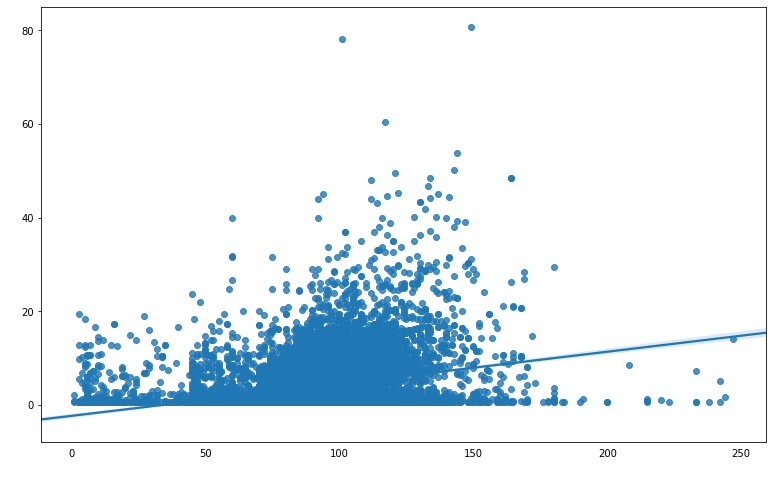

In [64]:
sns.set_style({'grid.color': 'black', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
               'axes.edgecolor': 'black','axes.labelcolor': 'white', 'xtick.color': 'black',
               'ytick.color': 'black'})

plt.figure(figsize=(13, 8))
sns.regplot(x='runtime_minutes', y='popularity', data=df)
plt.show()

In [19]:
cur.execute('''SELECT *
               FROM imdb_title_basics
               JOIN tmdb_movies
               ON imdb_title_basics.original_title = tmdb_movies.original_title
               WHERE runtime_minutes < 250
               ORDER BY popularity DESC
               LIMIT 100
               ''')
df2 = pd.DataFrame(cur.fetchall()) 
df2.columns = [i[0] for i in cur.description]
df2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
1,tt2911666,John Wick,John Wick,2014,101.0,"Action,Crime,Thriller",11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
2,tt4633694,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation",23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
3,tt2310332,The Hobbit: The Battle of the Five Armies,The Hobbit: The Battle of the Five Armies,2014,144.0,"Adventure,Fantasy",11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


In [25]:
print('Top 100 Movies by Popularity')
print('Mean Runtime:',df2['runtime_minutes'].mean())
print('Median Runtime:',df2['runtime_minutes'].median())

Top 100 Movies by Popularity
Mean Runtime: 121.34
Median Runtime: 121.5


In [21]:
cur.execute('''SELECT *
               FROM imdb_title_basics
               JOIN tmdb_movies
               ON imdb_title_basics.original_title = tmdb_movies.original_title
               WHERE runtime_minutes < 250
               ORDER BY popularity
               LIMIT 100
               ''')
df3 = pd.DataFrame(cur.fetchall())
df3.columns = [i[0] for i in cur.description]
df3.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,tt0393049,Anderson's Cross,Anderson's Cross,2010,98.0,"Comedy,Drama,Romance",2237,"[10749, 35, 18]",324352,en,Anderson's Cross,0.6,2010-05-20,Anderson's Cross,5.0,1
1,tt0451154,The Passing,The Passing,2011,92.0,Horror,13637,"[9648, 27]",386879,en,The Passing,0.6,2014-10-27,The Passing,6.5,2
2,tt0462036,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110.0,Drama,7793,[18],304037,en,Steve Phoenix: The Untold Story,0.6,2012-01-01,Steve Phoenix: The Untold Story,3.0,2
3,tt0464891,Act Your Age,Act Your Age,2011,101.0,"Comedy,Drama",4845,"[35, 18]",273001,en,Act Your Age,0.6,2011-04-01,Act Your Age,5.5,2
4,tt0477080,Unstoppable,Unstoppable,2010,98.0,"Action,Thriller",10970,[99],217664,en,Unstoppable,0.6,2013-09-24,Unstoppable,1.6,4


In [26]:
print('Bottom 100 Movies by Popularity')
print('Mean Runtime:',df3['runtime_minutes'].mean())
print('Median Runtime:',df3['runtime_minutes'].median())

Bottom 100 Movies by Popularity
Mean Runtime: 86.43
Median Runtime: 88.0


In [46]:
np.corrcoef(df['runtime_minutes'], df['popularity'])

array([[1.        , 0.27727322],
       [0.27727322, 1.        ]])

### Looking at relationship between runtime and movie gross

In [53]:
cur.execute('''SELECT *
               FROM imdb_title_basics
               JOIN tn_movie_budgets
               ON imdb_title_basics.original_title = tn_movie_budgets.movie
               WHERE runtime_minutes < 250
               ''')
df4 = pd.DataFrame(cur.fetchall())
df4.columns = [i[0] for i in cur.description]
df4.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,release_day,release_month
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1325,26,2010-02-12 00:00:00,Foodfight!,45000000,0,73706,-45000000,-44926294,4.0,2.0
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,5620,21,2012-07-12 00:00:00,The Overnight,200000,1109808,1165996,909808,965996,3.0,7.0
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",2316,17,2010-10-15 00:00:00,On the Road,25000000,720828,9313302,-24279172,-15686698,4.0,10.0
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",436,37,2010-05-15 00:00:00,The Secret Life of Walter Mitty,91000000,58236838,187861183,-32763162,96861183,5.0,5.0
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",2066,67,2010-01-05 00:00:00,A Walk Among the Tombstones,28000000,26017685,62108587,-1982315,34108587,1.0,1.0


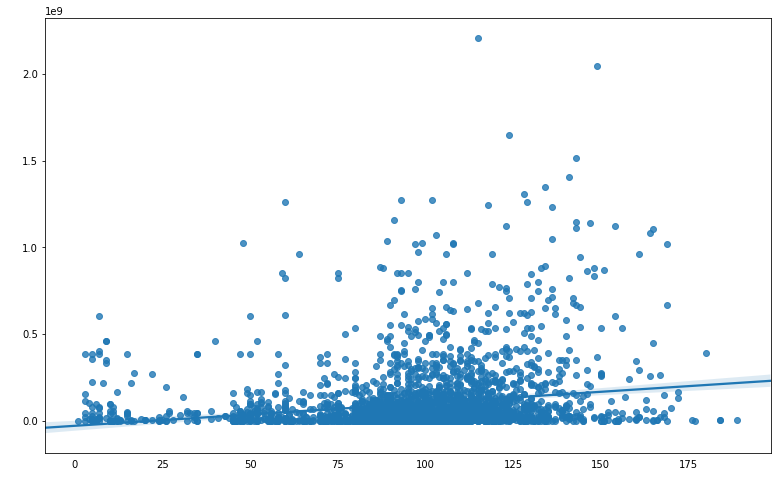

In [65]:
sns.set_style({'grid.color': 'black', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
               'axes.edgecolor': 'black','axes.labelcolor': 'white', 'xtick.color': 'black',
               'ytick.color': 'black'})

plt.figure(figsize=(13, 8))
sns.regplot(x='runtime_minutes', y='worldwide_gross', data=df4)
plt.show()

In [42]:
cur.execute('''SELECT *
               FROM imdb_title_basics
               JOIN tn_movie_budgets
               ON imdb_title_basics.original_title = tn_movie_budgets.movie
               WHERE runtime_minutes < 250
               ORDER BY worldwide_gross DESC
               LIMIT 100
               ''')
df5 = pd.DataFrame(cur.fetchall())
df5.columns = [i[0] for i in cur.description]
df5.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,release_day,release_month
0,tt8852130,Titanic,Titanic,2018,115.0,Family,42,43,2010-06-24 00:00:00,Titanic,200000000,659363944,2208208395,459363944,2008208395,3.0,6.0
1,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",6,7,2009-12-18 00:00:00,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,4.0,12.0
2,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",33,34,2007-08-03 00:00:00,Jurassic World,215000000,652270625,1648854864,437270625,1433854864,4.0,8.0
3,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",26,27,1995-04-07 00:00:00,The Avengers,225000000,623279547,1517935897,398279547,1292935897,4.0,4.0
4,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",3,4,1995-11-22 00:00:00,Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,2.0,11.0


In [43]:
print('Top 100 Movies by Worldwide Gross')
print('Mean Runtime:',df5['runtime_minutes'].mean())
print('Median Runtime:',df5['runtime_minutes'].median())

Top 100 Movies by Worldwide Gross
Mean Runtime: 117.17
Median Runtime: 122.0


In [48]:
cur.execute('''SELECT *
               FROM imdb_title_basics
               JOIN tn_movie_budgets
               ON imdb_title_basics.original_title = tn_movie_budgets.movie
               WHERE runtime_minutes < 250
               ORDER BY worldwide_gross
               LIMIT 100
               ''')
df6 = pd.DataFrame(cur.fetchall())
df6.columns = [i[0] for i in cur.description]
df6.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,release_day,release_month
0,tt0393049,Anderson's Cross,Anderson's Cross,2010,98.0,"Comedy,Drama,Romance",5564,65,None,Anderson's Cross,300000,0,0,-300000,-300000,NaN,NaN
1,tt0464054,House at the End of the Drive,House at the End of the Drive,2014,91.0,"Horror,Thriller",5127,28,2011-01-28 00:00:00,House at the End of the Drive,1400000,0,0,-1400000,-1400000,4.0,1.0
2,tt0482461,Barry Munday,Barry Munday,2010,95.0,"Comedy,Drama,Romance",4760,61,None,Barry Munday,3000000,0,0,-3000000,-3000000,NaN,NaN
3,tt0882977,Snitch,Snitch,2013,112.0,"Action,Drama,Thriller",5351,52,None,Snitch,850000,0,0,-850000,-850000,NaN,NaN
4,tt0923653,The Dead Undead,The Dead Undead,2010,89.0,"Action,Horror,Sci-Fi",5206,7,1998-08-21 00:00:00,The Dead Undead,1100000,0,0,-1100000,-1100000,4.0,8.0


In [49]:
print('Bottom 100 Movies by Worldwide Gross')
print('Mean Runtime:',df6['runtime_minutes'].mean())
print('Median Runtime:',df6['runtime_minutes'].median())

Bottom 100 Movies by Worldwide Gross
Mean Runtime: 90.18
Median Runtime: 93.0


In [54]:
np.corrcoef(df4['runtime_minutes'], df4['worldwide_gross'])

array([[1.        , 0.18450329],
       [0.18450329, 1.        ]])

# Conclusions
It seems that the most popular and the highest grossing movies average around the 120 minute mark while the least popular and lowest grossing movies average around the 87-90 minute mark

If you think anecdotally about the most popular movies (Avatar, Titanic, Marvel movies, etc.), this fits what we would expect. People generally like longer, more involved movies.

In [75]:
df['runtime_minutes'].mean()

90.53869499241274